A basic analysis of the kinematic properties of dimuons produced in MC simulated backgrounds using Uproot. The notebook is written in a virtual enviroment using Python 3.6.13 on the IFT ATLAS computers. 

The required packages are 
- Numpy
- Pandas
- Uproot
- Awkward (Numpy for non-fixed sized lists)
- Any plotting package, e.g. matplotlib/seaborn

In [100]:
path = "/disk/atlas3/data_MC/21.2.121/SUSY3/MC16a/vector_Baseline/backgrounds/"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import uproot
import hist

zmumu = uproot.open(path + "zmumu.root")
ztautau = uproot.open(path + "ztautau.root")

The ROOT data format takes some time to get used to. Essentially, ROOT files are composed of several TTrees and TH1F objects, the most relevant being the TTree objects. These contain tabular data indexed by various branches. To view the content of a ROOT file there are several options. Assuming the ROOT file is loaded in as "tree", the object names can be viewed by tree.keys() or tree.classnames(). The latter provides a description about the object type as well. 

In [101]:
zmumu.classnames()

{'NOMINAL;3': 'TTree',
 'NOMINAL;2': 'TTree',
 'Baseline_cutflow;1': 'TH1F',
 'Baseline_cutflow_unweighted;1': 'TH1F',
 'skim_metadata;1': 'TTree'}

The event data is stored in TTrres called NOMINAL;XYZ, where XYZ refers to the cycle-number, in short they are updated versions of one another. Thus, the larger the number, the newer the data. We will go with NOMINAL;3 as it is the newest <--> has the largest cycle-number.

To view the full list of features(variables)(branches) of the TTree and their datatype we can use tree["NOMINAL;XYZ"].show(), which in our case is zmumu["NOMINAL;3"].show(). Note that the number of features is generally very large in particle physics data (n_feat > 100).

From the list of features we wish to select all features concerning muons, ininitalized by "mu_", which can be achieved by the .arrays() method https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.HasBranches.html#uproot-behaviors-tbranch-hasbranches-arrays, specifying a filter selecting all features starting with "mu_".


In [102]:
muons = zmumu["NOMINAL;3"].arrays(filter_name = "mu_*")

The muon information is stored in awkward arrays, which act similar to dictionaries, e.g. they are accessible by tree["branch_name"].
Performing conditional cuts is similar to Pandas, e.g. tree["branch_name", cut1 & cut2].
Feel free to impose(&)/remove additional cuts.

By selecting two muons in the final state, the resulting array after cuts will have two columns, one for each muon. To obtain a single column one can impose an additional condition on the cut by including a "0" or a "1" as follows: tree["branch_name", cut1 & cut2, 0].

In [103]:
mu_n_cut = (muons["mu_n"] == 2) 

pt1 = muons["mu_pt", mu_n_cut, 0]
pt2 = muons["mu_pt", mu_n_cut, 1]
eta1 = muons["mu_eta", mu_n_cut, 0]
eta2 = muons["mu_eta", mu_n_cut, 1]
phi1 = muons["mu_phi", mu_n_cut, 0]
phi2 = muons["mu_phi", mu_n_cut, 1]

mu_mass = np.sqrt(2*pt1*pt2*(np.cosh(eta1-eta2) - np.cos(phi1-phi2)))

The simplest way to plot distributions, e.g. the invariant mass of the dimuon pair, is to convert the awkward array into a Pandas dataframe or a Numpy array and plot with Matplotlib, e.g. matplotlib.hist can deal with mu_mass as it is, while seaborn.histplot cannot. The latter needs np.array(mu_mass) as input.

It can be nice to view the data as a Pandas dataframe to check that the result of cuts makes sense. 

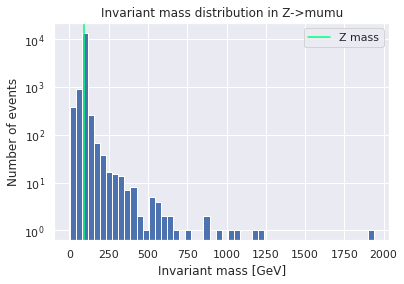

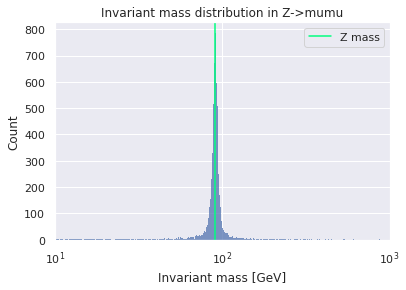

In [104]:
#Matplotlib histogram example
plt.figure()
seaborn.set_theme()
plt.hist(mu_mass/1000, log = True, bins = 50) #MeV to GeV conversion
plt.xlabel("Invariant mass [GeV]")
plt.ylabel("Number of events")
plt.title("Invariant mass distribution in Z->mumu")
plt.axvline(x = 91, color = "springgreen", label = "Z mass") #Z mass
plt.legend()
plt.show()

#Seaborn histplot example
plt.figure()
seaborn.histplot(np.array(mu_mass)/1000, log_scale= True)
plt.xlabel("Invariant mass [GeV]")
plt.xlim([10, 1000])
plt.title("Invariant mass distribution in Z->mumu")
plt.axvline(x = 91, color = "springgreen", label = "Z mass")
plt.legend()
plt.show()

